In [1]:
! pip install pandas

In [2]:
! pip install numpy

In [3]:
! pip install matplotlib

In [4]:
! pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### 1. 데이터 불러오기

In [2]:
file = pd.read_csv("top_selling_mobile_phones.csv")
file.head(5)

,Manufacturer,Model,Form factor,Smartphone?,Year,Graph (million units),Graph (million units).1
0,Nokia,1100,Bar,No,2003,250[4][1][5],NaN
1,Nokia,1110,Bar,No,2005,247.5[4][1][6],NaN
2,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,222.4[7],NaN
3,Nokia,"105 series,",Bar,No,2013,200[8],NaN
4,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.1[9][10][11][12],NaN


### 2. 필요한 항목(연도, 스마트폰 여부, 폼팩터, 제조사)
- 3-1) 연도별 - 스마트폰 Y/N
- 3-2) 스마트폰 중, 연도별 - 폼팩터
- 3-3) 연도별 - 제조사
- (columns명을 수정해서 가져올 거)

In [3]:
# 연도 스마트폰 여부 / 폼팩터
file_2 = pd.DataFrame({'year': file['Year'],
                       'smartP': file['Smartphone?'],
                       'formF':file['Form factor']})
file_2.head(5)

,year,smartP,formF
0,2003,No,Bar
1,2005,No,Bar
2,2014,Yes,Touchscreen
3,2013,No,Bar
4,2015,Yes,Touchscreen


### 3-1. "연도별 - 스마트폰 Y/N"

##### (1) 연도별로 yes가 몇개인지, no 가 몇개인지 알고 싶다

- 딕셔너리 형태를 만들고 싶음_dict()
- { 2020 : {'yes' : 1, 'no' : 2}, ... }이런식으로
- yes/no가 각각 얼마나 있는지도 알아야하니까 value_counts()써야할 것 같음

In [4]:
# 연도기준으로 그룹을 묶고 스마트폰 Y/N 를 딕셔너리 형태로 만듦
for y, s in file_2.groupby('year'):
    print(y, s['smartP'].value_counts().to_dict())
    # yes, no 가 몇개씩 되는지 value_counts()

1996 {'No': 1}
1999 {'No': 1}
2000 {'No': 1}
2003 {'No': 5, 'Yes': 2}
2004 {'No': 6}
2005 {'No': 4, 'Yes': 1}
2006 {'No': 5, 'Yes': 1}
2007 {'No': 5, 'Yes': 3}
2008 {'No': 2, 'Yes': 2}
2009 {'Yes': 3, 'No': 3}
2010 {'Yes': 2, 'No': 1}
2011 {'Yes': 5}
2012 {'Yes': 4}
2013 {'Yes': 4, 'No': 1}
2014 {'Yes': 3}
2015 {'Yes': 2}
2016 {'Yes': 7}
2017 {'Yes': 5}
2018 {'Yes': 8}
2019 {'Yes': 18}
2020 {'Yes': 8}
2021 {'Yes': 1}
2022 {'Yes': 1}


- 연도도 묶어야하는데..
- 빈 딕셔너리 하나 만들어주고
- s['smartP'].value_counts().to_dict() 이걸 s_count로 받을거임

In [5]:
year_yesno = {}

for y, s in file_2.groupby('year'):
    s_count = s['smartP'].value_counts().to_dict()  # 위에꺼
    year_yesno[y] = s_count

print(year_yesno)

{1996: {'No': 1}, 1999: {'No': 1}, 2000: {'No': 1}, 2003: {'No': 5, 'Yes': 2}, 2004: {'No': 6}, 2005: {'No': 4, 'Yes': 1}, 2006: {'No': 5, 'Yes': 1}, 2007: {'No': 5, 'Yes': 3}, 2008: {'No': 2, 'Yes': 2}, 2009: {'Yes': 3, 'No': 3}, 2010: {'Yes': 2, 'No': 1}, 2011: {'Yes': 5}, 2012: {'Yes': 4}, 2013: {'Yes': 4, 'No': 1}, 2014: {'Yes': 3}, 2015: {'Yes': 2}, 2016: {'Yes': 7}, 2017: {'Yes': 5}, 2018: {'Yes': 8}, 2019: {'Yes': 18}, 2020: {'Yes': 8}, 2021: {'Yes': 1}, 2022: {'Yes': 1}}


##### (2) year_yesno을 데이터프레임 형태로 만들고 싶음

- 연도를 행으로, yes/no을 열 제목으로 만들고 싶음

In [6]:
result = pd.DataFrame(year_yesno)
print(result)

     1996  1999  2000  2003  2004  2005  2006  2007  2008  2009  ...  2013  \
No    1.0   1.0   1.0     5   6.0     4     5     5     2     3  ...     1   
Yes   NaN   NaN   NaN     2   NaN     1     1     3     2     3  ...     4   

     2014  2015  2016  2017  2018  2019  2020  2021  2022  
No    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Yes   3.0   2.0   7.0   5.0   8.0  18.0   8.0   1.0   1.0  

[2 rows x 23 columns]


- 아.. 전치가 필요할 것 같음

In [7]:
result = pd.DataFrame(year_yesno).T
print(result)

       No   Yes
1996  1.0   NaN
1999  1.0   NaN
2000  1.0   NaN
2003  5.0   2.0
2004  6.0   NaN
2005  4.0   1.0
2006  5.0   1.0
2007  5.0   3.0
2008  2.0   2.0
2009  3.0   3.0
2010  1.0   2.0
2011  NaN   5.0
2012  NaN   4.0
2013  1.0   4.0
2014  NaN   3.0
2015  NaN   2.0
2016  NaN   7.0
2017  NaN   5.0
2018  NaN   8.0
2019  NaN  18.0
2020  NaN   8.0
2021  NaN   1.0
2022  NaN   1.0


- 그.. NaN값은 다 0으로 채워주고 값들을 정수로 바꿔야겠음

In [8]:
result1 = pd.DataFrame(year_yesno).T\
    .fillna(0).astype(int)
print(result1)

      No  Yes
1996   1    0
1999   1    0
2000   1    0
2003   5    2
2004   6    0
2005   4    1
2006   5    1
2007   5    3
2008   2    2
2009   3    3
2010   1    2
2011   0    5
2012   0    4
2013   1    4
2014   0    3
2015   0    2
2016   0    7
2017   0    5
2018   0    8
2019   0   18
2020   0    8
2021   0    1
2022   0    1


##### (3) 3의 결과(result1)를 그래프로 그리고 싶다

- x 축에는 연도, y 축에는 yes/no의 수를 나타내고 싶음

In [9]:
year = result1.index
form = list(result1.columns)

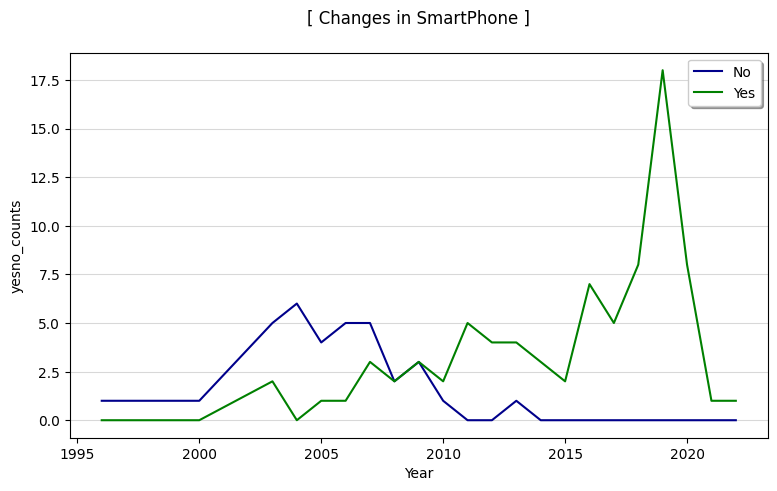

In [10]:

plt.rcParams["figure.figsize"] = (9,5)

colors = ['darkblue', 'green']
result1.plot(kind='line', color = colors)

plt.title("[ Changes in SmartPhone ]\n")
plt.xlabel('Year')
plt.ylabel('yesno_counts')
plt.legend(loc='best', shadow = True)
plt.grid(True, axis='y', color = 'gray', alpha =0.3)

plt.show()


### 3-2. 스마트폰 = "Yes" 중 "연도별-폼팩터"

##### (1) 스마트폰 = "YES"인 것 뽑아내기

In [11]:
yes = file_2[file_2.smartP == "Yes"]
print(yes)

     year smartP         formF
2    2014    Yes   Touchscreen
4    2015    Yes   Touchscreen
5    2013    Yes   Touchscreen
7    2016    Yes   Touchscreen
8    2019    Yes   Touchscreen
..    ...    ...           ...
110  2013    Yes   Touchscreen
111  2016    Yes   Touchscreen
112  2016    Yes   Touchscreen
113  2007    Yes  Keyboard bar
114  2009    Yes   Tilt slider

[80 rows x 3 columns]


##### (2) 연도별로 어떤 폼팩터들이 얼마나 있었는지 뽑고 싶다

###### 연도별로 어떤 폼팩터들이 있었는지 뽑고싶다. 사실 과정상 필요한 작업은 아닌데 눈으로 보고 싶어서 그냥 함

- yes에서 연도기준으로 그룹을 묶고 폼팩터들을 보고 싶음
- 리스트로 볼거임

In [12]:
yes.groupby(yes.year)['formF'].apply(list)

year
2003                                          [Bar, Taco]
2005                                                [Bar]
2006                                                [Bar]
2007                  [Slider, Touchscreen, Keyboard bar]
2008                          [Touchscreen, Keyboard bar]
2009              [Touchscreen, Touchscreen, Tilt slider]
2010                           [Touchscreen, Touchscreen]
2011    [Touchscreen, Touchscreen, Touchscreen, Touchs...
2012    [Touchscreen, Touchscreen, Touchscreen, Touchs...
2013    [Touchscreen, Touchscreen, Touchscreen, Touchs...
2014              [Touchscreen, Touchscreen, Touchscreen]
2015                           [Touchscreen, Touchscreen]
2016    [Touchscreen, Touchscreen, Touchscreen, Touchs...
2017    [Touchscreen, Touchscreen, Touchscreen, Touchs...
2018    [Touchscreen, Touchscreen, Touchscreen, Touchs...
2019    [Touchscreen, Touchscreen, Touchscreen, Touchs...
2020    [Touchscreen, Touchscreen, Touchscreen, Touchs...
2021     

##### ▼▼▼▼▼


- yes에서 연도별로 그룹을 만들거고, 만든 그룹에서 연도랑 폼팩터만 뽑을거야

- y는 'year'를 담을 거고, f는 데이터를 담을 건데,  ['formF']의 데이터만 담을거임

- 최종적으로 딕셔너리 형태를 만들고 싶음_dict()
- 폼팩터별로 얼마나 있는지도 알아야하니까 value_counts()써야할 것 같음

- ex) {2020 : {'Bar':1, 'Touch':2}, 2023 : {'Silder':2}, ...}

In [13]:
for y, f in yes.groupby('year'):
    print(y, f['formF'].value_counts().to_dict())

2003 {'Bar': 1, 'Taco': 1}
2005 {'Bar': 1}
2006 {'Bar': 1}
2007 {'Slider': 1, 'Touchscreen': 1, 'Keyboard bar': 1}
2008 {'Touchscreen': 1, 'Keyboard bar': 1}
2009 {'Touchscreen': 2, 'Tilt slider': 1}
2010 {'Touchscreen': 2}
2011 {'Touchscreen': 5}
2012 {'Touchscreen': 4}
2013 {'Touchscreen': 4}
2014 {'Touchscreen': 3}
2015 {'Touchscreen': 2}
2016 {'Touchscreen': 7}
2017 {'Touchscreen': 5}
2018 {'Touchscreen': 8}
2019 {'Touchscreen': 18}
2020 {'Touchscreen': 8}
2021 {'Touchscreen': 1}
2022 {'Touchscreen': 1}


- 아... 연도랑 폼팩터 묶고 싶음
- 빈 딕셔너리 하나 만들어주고
- f['formF'].value_counts().to_dict() 이걸 f_count로 받을거임

- year_form 딕셔너리에
- 2020 : {'Bar':1, 'Touch':2}  이런식으로 묶어서 넣을꺼니까
- year_form[y] = f_count

In [14]:
year_form = {}

for y, f in yes.groupby('year'):
    f_count = f['formF'].value_counts().to_dict()   # 위에꺼
    year_form[y] = f_count

print(year_form)

{2003: {'Bar': 1, 'Taco': 1}, 2005: {'Bar': 1}, 2006: {'Bar': 1}, 2007: {'Slider': 1, 'Touchscreen': 1, 'Keyboard bar': 1}, 2008: {'Touchscreen': 1, 'Keyboard bar': 1}, 2009: {'Touchscreen': 2, 'Tilt slider': 1}, 2010: {'Touchscreen': 2}, 2011: {'Touchscreen': 5}, 2012: {'Touchscreen': 4}, 2013: {'Touchscreen': 4}, 2014: {'Touchscreen': 3}, 2015: {'Touchscreen': 2}, 2016: {'Touchscreen': 7}, 2017: {'Touchscreen': 5}, 2018: {'Touchscreen': 8}, 2019: {'Touchscreen': 18}, 2020: {'Touchscreen': 8}, 2021: {'Touchscreen': 1}, 2022: {'Touchscreen': 1}}


##### (3) year_form을 데이터프레임 형태로 만들고 싶음

- 연도를 행으로, form을 열 제목으로 만들고 싶음

In [15]:
result2 = pd.DataFrame(year_form)
print(result2)

              2003  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
Bar            1.0   1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Taco           1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Slider         NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
Touchscreen    NaN   NaN   NaN   1.0   1.0   2.0   2.0   5.0   4.0   4.0   
Keyboard bar   NaN   NaN   NaN   1.0   1.0   NaN   NaN   NaN   NaN   NaN   
Tilt slider    NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   

              2014  2015  2016  2017  2018  2019  2020  2021  2022  
Bar            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Taco           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Slider         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Touchscreen    3.0   2.0   7.0   5.0   8.0  18.0   8.0   1.0   1.0  
Keyboard bar   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Tilt slider    NaN   NaN   NaN   NaN   NaN   NaN   Na

- 아.. 전치가 필요할 것 같음

In [16]:
result2 = pd.DataFrame(year_form).T
print(result2)

      Bar  Taco  Slider  Touchscreen  Keyboard bar  Tilt slider
2003  1.0   1.0     NaN          NaN           NaN          NaN
2005  1.0   NaN     NaN          NaN           NaN          NaN
2006  1.0   NaN     NaN          NaN           NaN          NaN
2007  NaN   NaN     1.0          1.0           1.0          NaN
2008  NaN   NaN     NaN          1.0           1.0          NaN
2009  NaN   NaN     NaN          2.0           NaN          1.0
2010  NaN   NaN     NaN          2.0           NaN          NaN
2011  NaN   NaN     NaN          5.0           NaN          NaN
2012  NaN   NaN     NaN          4.0           NaN          NaN
2013  NaN   NaN     NaN          4.0           NaN          NaN
2014  NaN   NaN     NaN          3.0           NaN          NaN
2015  NaN   NaN     NaN          2.0           NaN          NaN
2016  NaN   NaN     NaN          7.0           NaN          NaN
2017  NaN   NaN     NaN          5.0           NaN          NaN
2018  NaN   NaN     NaN          8.0    

- 그.. NaN값은 다 0으로 채워주고 값들을 정수로 바꿔야겠음

In [17]:
result2 = pd.DataFrame(year_form).T.fillna(0).astype(int)
print(result2)

      Bar  Taco  Slider  Touchscreen  Keyboard bar  Tilt slider
2003    1     1       0            0             0            0
2005    1     0       0            0             0            0
2006    1     0       0            0             0            0
2007    0     0       1            1             1            0
2008    0     0       0            1             1            0
2009    0     0       0            2             0            1
2010    0     0       0            2             0            0
2011    0     0       0            5             0            0
2012    0     0       0            4             0            0
2013    0     0       0            4             0            0
2014    0     0       0            3             0            0
2015    0     0       0            2             0            0
2016    0     0       0            7             0            0
2017    0     0       0            5             0            0
2018    0     0       0            8    

##### (4) 3의 결과(result2)를 그래프로 그리고 싶다

- x 축에는 연도, y 축에는 폼팩터의 수를 나타내고 싶음

In [18]:
year = result2.index
form = list(result2.columns)

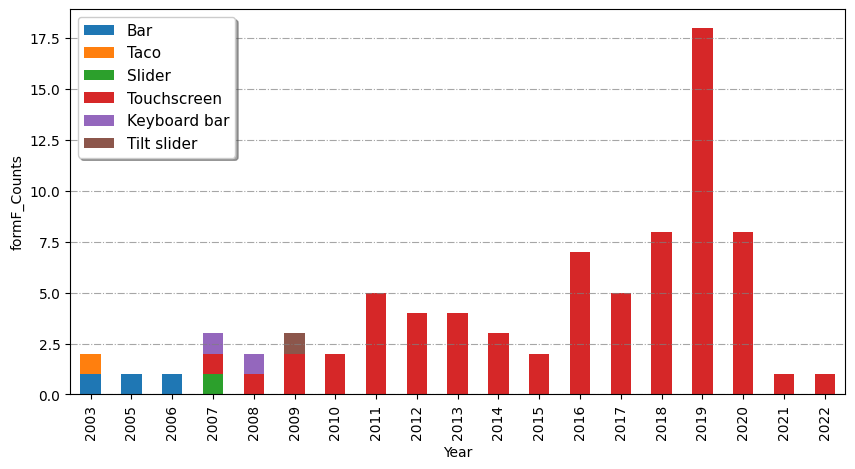

In [19]:
plt.rcParams["figure.figsize"] = (10,5)
result2.plot(kind='bar', stacked='TRUE')   # 이 구문은.. ㅎ

plt.xlabel('Year')
plt.ylabel('formF_Counts')
plt.grid(True, axis='y', color = 'gray', alpha = 0.7, linestyle = "-.")
plt.legend(shadow=True, fontsize=11)

plt.show()


### 3-3. "연도별 - 제조사"

##### (1) 연도와 제조사를 뽑아낸다

In [20]:
file_3 = pd.DataFrame({'year': file['Year'],
                       'manu': file['Manufacturer']})
file_3

,year,manu
0,2003,Nokia
1,2005,Nokia
2,2014,Apple
3,2013,Nokia
4,2015,Apple
...,...,...
110,2013,LG
111,2016,LeTV
112,2016,Google
113,2007,Palm


- 10년씩 나눠서 열에 추가할 건데, 10년단위는 같은 문자로 묶어버릴거임

In [21]:
file_3_year = file_3.sort_values(by='year')

file_3_year["00~09"] = file_3_year.apply(lambda x : "00" \
                                         if 2000<=x.year<2010  \
                                            else "", axis=1) 

file_3_year["10~19"] = file_3_year.apply(lambda x : "10" \
                                         if 2010<=x.year<2020  \
                                            else "", axis=1) 

file_3_year["20~  "] = file_3_year.apply(lambda x : "20" \
                                         if 2020<=x.year  \
                                            else "", axis=1) 

file_3_year

,year,manu,00~09,10~19,20~
29,1996,Motorola,,,
6,1999,Nokia,,,
18,2000,Nokia,00,,
0,2003,Nokia,00,,
109,2003,Nokia,00,,
...,...,...,...,...,...
79,2020,Xiaomi,,,20
64,2020,Samsung,,,20
57,2020,Apple,,,20
80,2021,Samsung,,,20


##### (2) 10년 단위로 제조사들을 뽑아낸다

- 각 제조사별 개수가 얼마나 되나 보자

In [22]:
manu_00 = file_3_year[file_3_year["00~09"] == '00']["manu"]
m0 = manu_00.value_counts()
pd.DataFrame(m0)

,count
manu,
Nokia,24
LG,5
Samsung,4
Motorola,3
Sony Ericsson,3
Apple,2
Research In Motion (RIM),1
Palm,1


In [23]:
manu_10 = file_3_year[file_3_year["10~19"] == '10']["manu"]
m1 = manu_10.value_counts()
pd.DataFrame(m1)

,count
manu,
Samsung,27
Apple,11
Xiaomi,6
Huawei,6
Nokia,2
LG,2
Oppo,2
Motorola,1
HTC,1


In [24]:
manu_20 = file_3_year[file_3_year["20~  "] == '20']["manu"]
m2 = manu_20.value_counts()
pd.DataFrame(m2)

,count
manu,
Samsung,6
Apple,3
Xiaomi,1


In [25]:
result5 = pd.merge(m0, m1,
                  how = 'outer',
                  left_index=True,
                  right_index=True
                  )
result5

,count_x,count_y
manu,,
Apple,2.0,11.0
Google,NaN,1.0
HTC,NaN,1.0
Huawei,NaN,6.0
LG,5.0,2.0
LeTV,NaN,1.0
Motorola,3.0,1.0
Nokia,24.0,2.0
Oppo,NaN,2.0


In [26]:
result6 = pd.merge(result5, m2,
                   how = 'outer',
                   left_index=True,
                   right_index=True
                   )
result6

,count_x,count_y,count
manu,,,
Apple,2.0,11.0,3.0
Google,NaN,1.0,NaN
HTC,NaN,1.0,NaN
Huawei,NaN,6.0,NaN
LG,5.0,2.0,NaN
LeTV,NaN,1.0,NaN
Motorola,3.0,1.0,NaN
Nokia,24.0,2.0,NaN
Oppo,NaN,2.0,NaN


In [27]:
result6.columns = ['00~09년', '10~19년', '20년~']

result6.fillna(0).astype(int)

,00~09년,10~19년,20년~
manu,,,
Apple,2,11,3
Google,0,1,0
HTC,0,1,0
Huawei,0,6,0
LG,5,2,0
LeTV,0,1,0
Motorola,3,1,0
Nokia,24,2,0
Oppo,0,2,0


In [31]:
result3 = pd.DataFrame((m0, m1, m2)).T.fillna(0).astype(int)
result3.columns = ['00~09년', '10~19년', '20년~']

result3

,00~09년,10~19년,20년~
manu,,,
Nokia,24,2,0
LG,5,2,0
Samsung,4,27,6
Motorola,3,1,0
Sony Ericsson,3,0,0
Apple,2,11,3
Research In Motion (RIM),1,0,0
Palm,1,0,0
Xiaomi,0,6,1


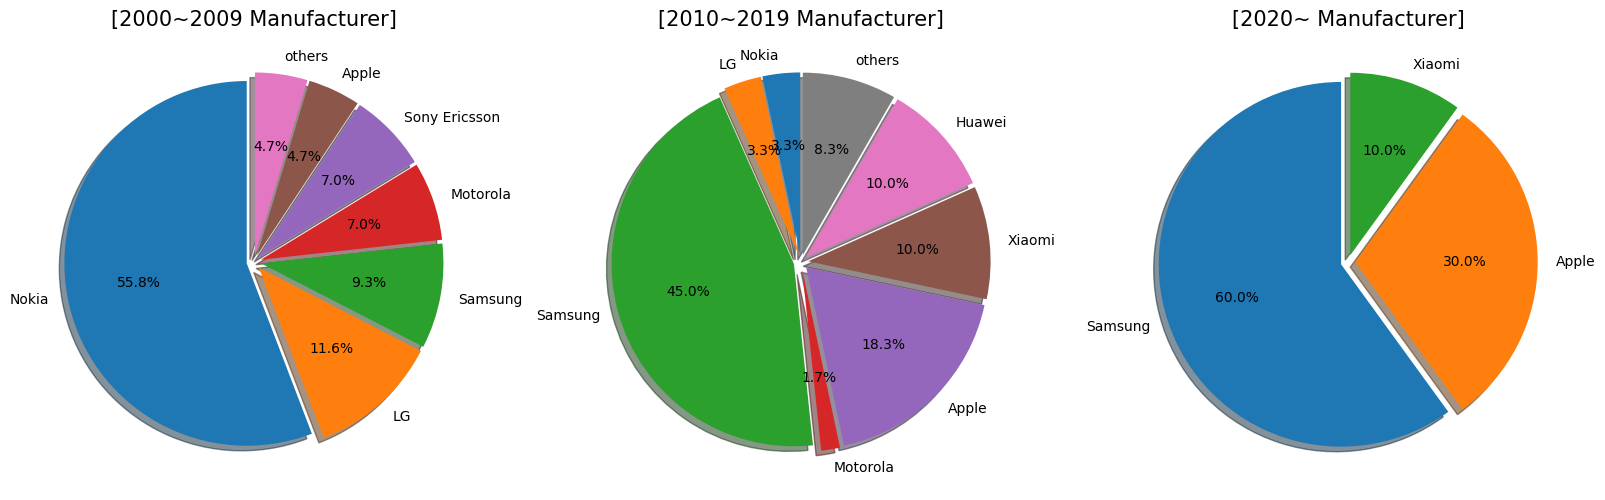

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

ratio_00 = [24, 5, 4, 3, 3, 2, 2]
plt.subplot(1, 3, 1)
labels_00 = ['Nokia', 'LG', 'Samsung', 'Motorola',
             'Sony Ericsson', 'Apple', 'others']
explode = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
colors = ['black', 'yellow', 'lightblue',
          'lightpink', 'orange', 'pink', 'C8']
plt.title('[2000~2009 Manufacturer]', fontsize=15)
plt.pie(ratio_00, labels=labels_00, autopct='%.1f%%',
        startangle=90, shadow = True, explode=explode)

plt.subplot(1, 3, 2)
ratio_10 = [2, 2, 27, 1, 11, 6, 6, 5]
labels_10 = ['Nokia', 'LG', 'Samsung', 'Motorola',
             'Apple', 'Xiaomi', 'Huawei', 'others']
explode = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
plt.title('[2010~2019 Manufacturer]', fontsize=15)
plt.pie(ratio_10, labels=labels_10, autopct='%.1f%%',
        startangle=90, shadow = True, explode=explode)

plt.subplot(1, 3, 3)
ratio_20 = [6,3,1]
labels_10 = ['Samsung', 'Apple', 'Xiaomi']
explode = [0.04, 0.04, 0.04]
plt.title('[2020~ Manufacturer]', fontsize=15)
plt.pie(ratio_20, labels=labels_10, autopct='%.1f%%',
        startangle=90, shadow = True, explode=explode)


plt.subplots_adjust(wspace=0.2)
plt.show()

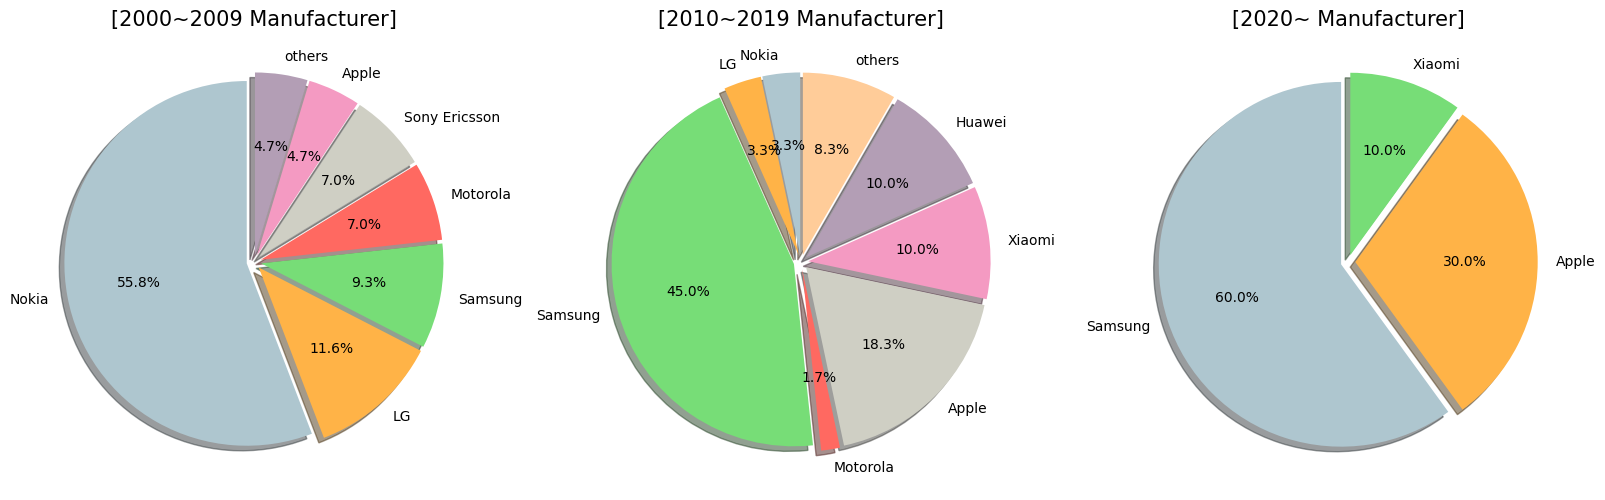

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# 색상 팔레트 설정
colors_00 = ['#AEC6CF', '#FFB347', '#77DD77', '#FF6961', '#CFCFC4', '#F49AC2', '#B39EB5']
colors_10 = ['#AEC6CF', '#FFB347', '#77DD77', '#FF6961', '#CFCFC4', '#F49AC2', '#B39EB5', '#FFCC99']
colors_20 = ['#AEC6CF', '#FFB347', '#77DD77']

# 2000~2009 Manufacturer
ratio_00 = [24, 5, 4, 3, 3, 2, 2]
labels_00 = ['Nokia', 'LG', 'Samsung', 'Motorola', 'Sony Ericsson', 'Apple', 'others']
explode = [0.04] * len(labels_00)
plt.subplot(1, 3, 1)
plt.title('[2000~2009 Manufacturer]', fontsize=15)
plt.pie(ratio_00, labels=labels_00, autopct='%.1f%%', startangle=90, shadow=True, explode=explode, colors=colors_00)

# 2010~2019 Manufacturer
ratio_10 = [2, 2, 27, 1, 11, 6, 6, 5]
labels_10 = ['Nokia', 'LG', 'Samsung', 'Motorola', 'Apple', 'Xiaomi', 'Huawei', 'others']
explode = [0.04] * len(labels_10)
plt.subplot(1, 3, 2)
plt.title('[2010~2019 Manufacturer]', fontsize=15)
plt.pie(ratio_10, labels=labels_10, autopct='%.1f%%', startangle=90, shadow=True, explode=explode, colors=colors_10)

# 2020~ Manufacturer
ratio_20 = [6, 3, 1]
labels_20 = ['Samsung', 'Apple', 'Xiaomi']
explode = [0.04] * len(labels_20)
plt.subplot(1, 3, 3)
plt.title('[2020~ Manufacturer]', fontsize=15)
plt.pie(ratio_20, labels=labels_20, autopct='%.1f%%', startangle=90, shadow=True, explode=explode, colors=colors_20)

plt.subplots_adjust(wspace=0.2)
plt.show()


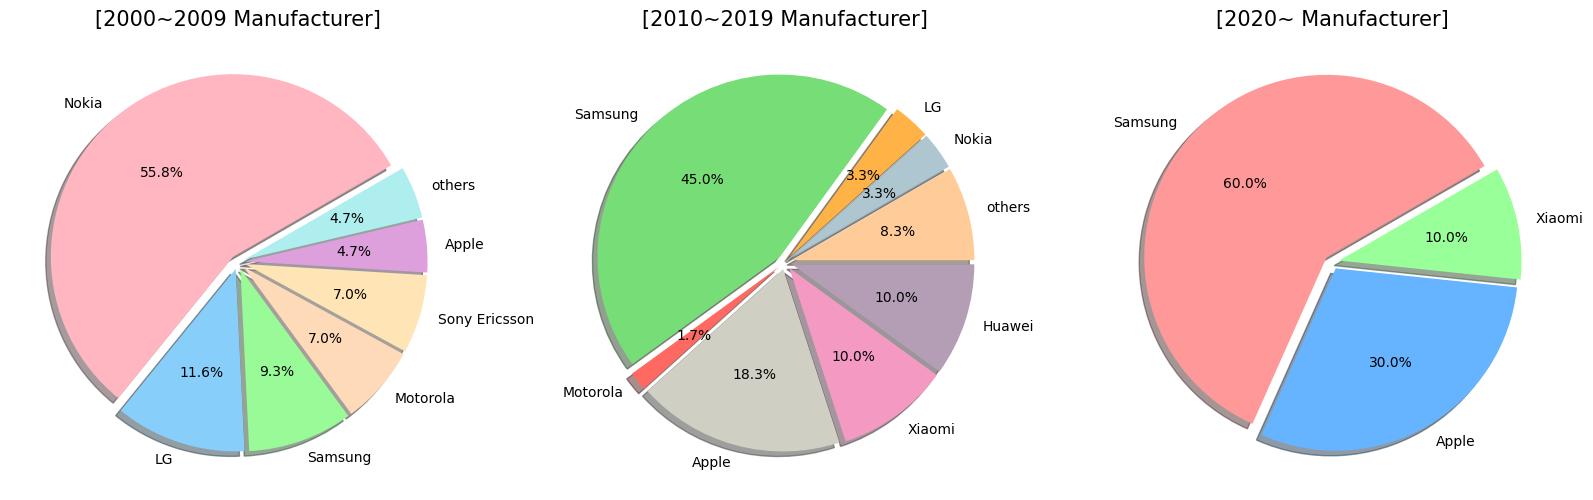

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# 파스텔 색상 팔레트 설정
colors_00 = ['#FFB6C1', '#87CEFA', '#98FB98', '#FFDAB9', '#FFE4B5', '#DDA0DD', '#AFEEEE']
colors_10 = ['#AEC6CF', '#FFB347', '#77DD77', '#FF6961', '#CFCFC4', '#F49AC2', '#B39EB5', '#FFCC99']
colors_20 = ['#FF9999', '#66B3FF', '#99FF99']

# 2000~2009 Manufacturer
ratio_00 = [24, 5, 4, 3, 3, 2, 2]
labels_00 = ['Nokia', 'LG', 'Samsung', 'Motorola', 'Sony Ericsson', 'Apple', 'others']
explode = [0.04] * len(labels_00)
plt.subplot(1, 3, 1)
plt.title('[2000~2009 Manufacturer]', fontsize=15)
plt.pie(ratio_00, labels=labels_00, autopct='%.1f%%', startangle=30, shadow=True, explode=explode, colors=colors_00)

# 2010~2019 Manufacturer
ratio_10 = [2, 2, 27, 1, 11, 6, 6, 5]
labels_10 = ['Nokia', 'LG', 'Samsung', 'Motorola', 'Apple', 'Xiaomi', 'Huawei', 'others']
explode = [0.04] * len(labels_10)
plt.subplot(1, 3, 2)
plt.title('[2010~2019 Manufacturer]', fontsize=15)
plt.pie(ratio_10, labels=labels_10, autopct='%.1f%%', startangle=30, shadow=True, explode=explode, colors=colors_10)

# 2020~ Manufacturer
ratio_20 = [6, 3, 1]
labels_20 = ['Samsung', 'Apple', 'Xiaomi']
explode = [0.04] * len(labels_20)
plt.subplot(1, 3, 3)
plt.title('[2020~ Manufacturer]', fontsize=15)
plt.pie(ratio_20, labels=labels_20, autopct='%.1f%%', startangle=30, shadow=True, explode=explode, colors=colors_20)

plt.subplots_adjust(wspace=0.2)
plt.show()


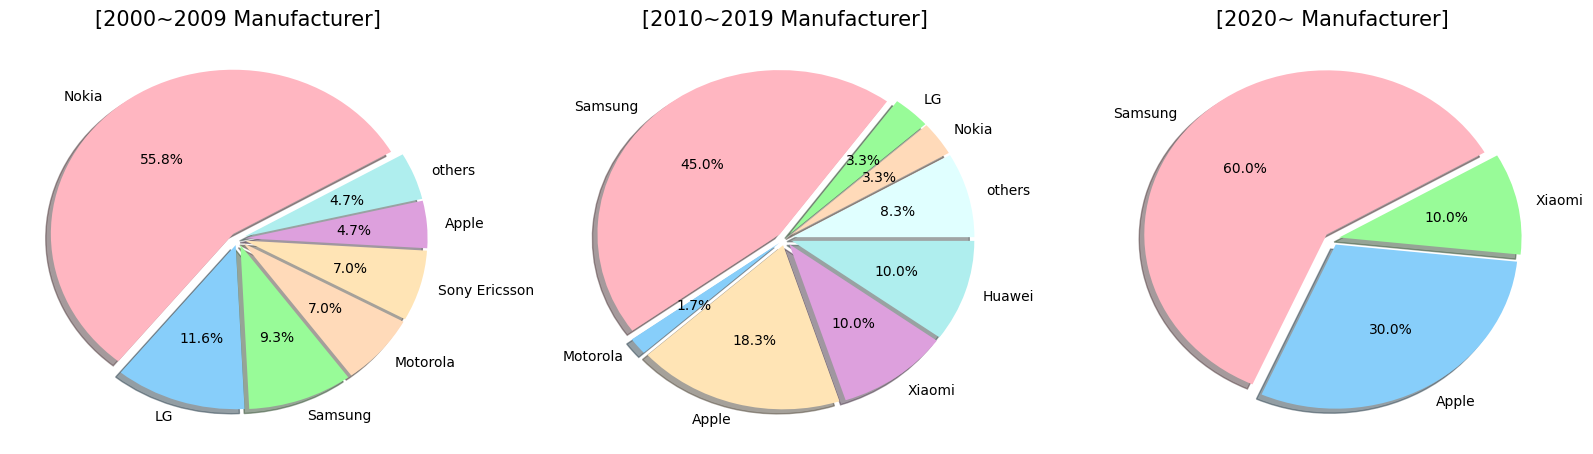

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# 새로운 파스텔 색상 팔레트 설정
colors_00 = ['#FFB6C1', '#87CEFA', '#98FB98', '#FFDAB9', '#FFE4B5', '#DDA0DD', '#AFEEEE']
colors_10 = ['#AEC6CF', '#FFB347', '#77DD77', '#FF6961', '#CFCFC4', '#F49AC2', '#B39EB5', '#FFCC99']
colors_20 = ['#FF9999', '#66B3FF', '#99FF99']

# 2000~2009 Manufacturer
ratio_00 = [24, 5, 4, 3, 3, 2, 2]
labels_00 = ['Nokia', 'LG', 'Samsung', 'Motorola', 'Sony Ericsson', 'Apple', 'others']
explode = [0.04] * len(labels_00)
plt.subplot(1, 3, 1)
plt.title('[2000~2009 Manufacturer]', fontsize=15)
plt.pie(ratio_00, labels=labels_00, autopct='%.1f%%', startangle=30, shadow=True, explode=explode, colors=colors_00)
plt.gca().set_aspect(0.9)

# 2010~2019 Manufacturer
ratio_10 = [2, 2, 27, 1, 11, 6, 6, 5]
labels_10 = ['Nokia', 'LG', 'Samsung', 'Motorola', 'Apple', 'Xiaomi', 'Huawei', 'others']
explode = [0.04] * len(labels_10)
plt.subplot(1, 3, 2)
plt.title('[2010~2019 Manufacturer]', fontsize=15)
plt.pie(ratio_10, labels=labels_10, autopct='%.1f%%', startangle=30, shadow=True, explode=explode, colors=colors_10)
plt.gca().set_aspect(0.9)

# 2020~ Manufacturer
ratio_20 = [6, 3, 1]
labels_20 = ['Samsung', 'Apple', 'Xiaomi']
explode = [0.04] * len(labels_20)
plt.subplot(1, 3, 3)
plt.title('[2020~ Manufacturer]', fontsize=15)
plt.pie(ratio_20, labels=labels_20, autopct='%.1f%%', startangle=30, shadow=True, explode=explode, colors=colors_20)
plt.gca().set_aspect(0.9)

plt.subplots_adjust(wspace=0.2)
plt.show()
